# <center>Global Warming EDA 🌏</center>

Examining the global warming and its depth, aiming to raise awareness of the topic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
from datetime import datetime
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import Image

In [2]:
# We install celluloid to create animated gifs
!pip install celluloid
from celluloid import Camera

In [3]:
# suppressing scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Data Understanding

This notebook uses data collected by Berkeley Earth, a non-profit organisation focused on land temperature data analysis for climate science.

Specifically, the dataset can be found on <a href="https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data" title="Kaggle">Kaggle</a>. 
Its temperatures date back to 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures. 

In particular, we explore the effect on a global scale, as well as a small country such as Greece.

In [4]:
df_global = pd.read_csv('../input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')

# Data Cleaning

Since the datasets have a similar structure, we create a function to clean them uniformly. Since the scope of this notebook is to investigate the global temperature, we will 

In [5]:
def clean_data(df, temp):
    df = df[df[temp].notna()]
    df['dt'] = pd.to_datetime(df['dt'], dayfirst=True)
    df['Year'] = df['dt'].dt.year
    df['Month'] = df['dt'].dt.month
    df['MonthName'] = df['dt'].dt.month_name()
    return df

In [6]:
df_global = clean_data(df_global, 'LandAverageTemperature')

In [7]:
df_global

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month,MonthName
0,1750-01-01,3.03,3.57,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,January
1,1750-02-01,3.08,3.70,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,February
2,1750-03-01,5.63,3.08,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,March
3,1750-04-01,8.49,2.45,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,April
4,1750-05-01,11.57,2.07,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,May
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.76,0.07,20.70,0.11,9.00,0.17,17.59,0.06,2015,8,August
3188,2015-09-01,13.00,0.08,18.84,0.09,7.20,0.23,17.05,0.06,2015,9,September
3189,2015-10-01,10.80,0.10,16.45,0.06,5.23,0.12,16.29,0.06,2015,10,October
3190,2015-11-01,7.43,0.12,12.89,0.09,2.16,0.11,15.25,0.06,2015,11,November


# Is it getting warmer?
First and foremost, we need to see whether an increase in the average global temperature has ensued. 

A prerequisite of a fair comparison is uniformly accurate temperature entires across all years. That is potentially problematic with older temperatures, considering the potentially inaccurate thermometers used in the 18th-19th century.
Therefore, we first explore the average temperature uncertainty.

# Temperature Uncertainty

In [8]:
temp_global = df_global.groupby(by=['Year']).mean().reset_index()

In [9]:
min_year = temp_global['Year'].min()
max_year = temp_global['Year'].max()

In [10]:
# plotting the Uncertainty and saving it as an image
fig_1 = go.Figure()
fig_1.add_trace(go.Scatter(x=list(temp_global.Year), 
                           y=list(temp_global.LandAverageTemperatureUncertainty), 
                           name = 'Uncertainty'))

# setting title
title = 'Land Average Temperature Uncertainty time series with range slider and selectors'
fig_1.update_layout(title_text=title)

# adding range slider
fig_1.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=50,
                     label="50y",
                     step="year",
                     stepmode="backward"),
                dict(count=100,
                     label="100y",
                     step="year",
                     stepmode="backward"),
                dict(count=165,
                     label="165y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")])
        ),
        rangeslider=dict(
            visible=True),
        type="date"))

fig_1.show()

Since the temperature uncertainty is pretty high before 1850 (which chronologically coincides with the end of the industrial revolution), we will only examine data after this point. Therefore the data comprises of 166 years, up until 2015.

In [11]:
temp_global = temp_global[temp_global.Year>=1850]
min_year = temp_global['Year'].min()

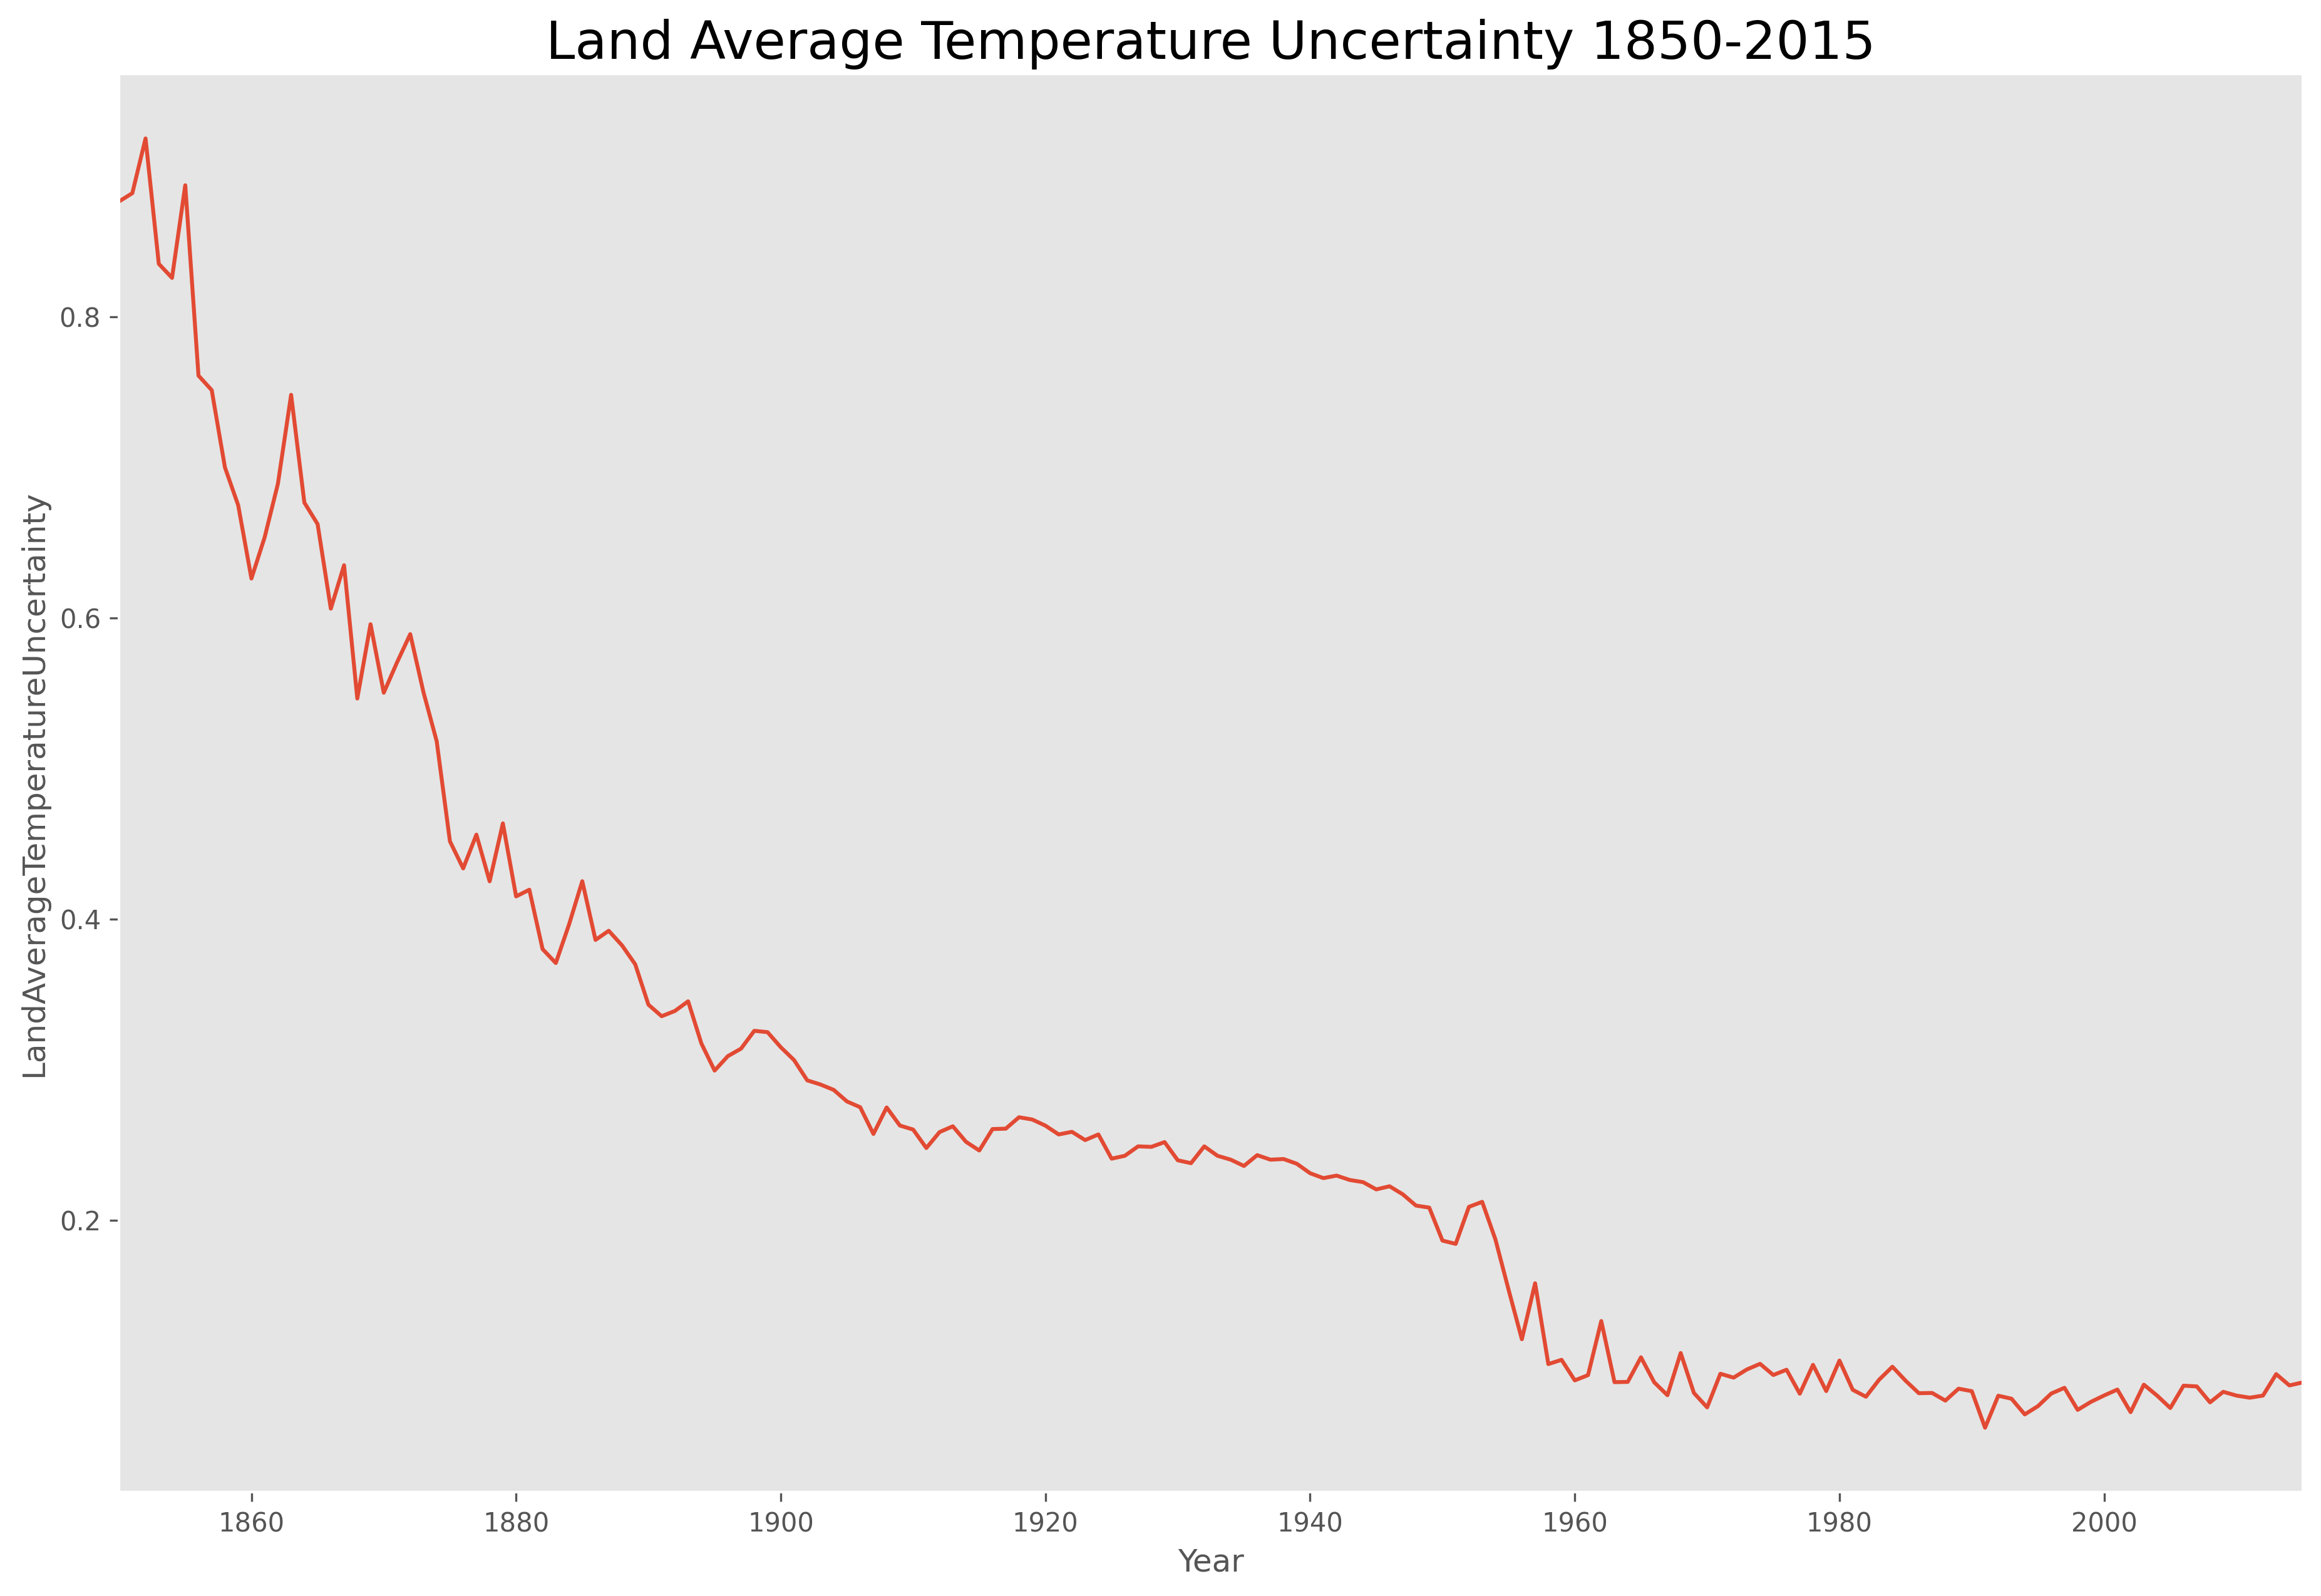

In [12]:
# plotting the Uncertainty and saving it as an image
plt.style.use('ggplot')
fig_2 = plt.figure(figsize=(15, 10),
                   dpi=300)
plt.grid(False)
with sns.axes_style("darkgrid"):
    sns.lineplot(x = temp_global.Year, 
                 y = temp_global.LandAverageTemperatureUncertainty, 
                 ci = None)
plt.title("Land Average Temperature Uncertainty 1850-2015", 
          fontsize=20)
plt.xlim(min_year, max_year)
plt.savefig('1_temp_uncertainty.png', 
            transparent = True)

We recognise the remaining uncertainty but consider it negligible. Therefore, let's explore the average temperature of the planet from 1850 to 2015. For this we will use both the *Average Land Temperature* and the *Average Land-Ocean Temperature* provided by the dataset. 

We will build (and save) a gif that captures any changes.

# Average Global Temperature (Animated)

In [13]:
fig_3, ax = plt.subplots(figsize=(10, 8))

plt.xlim(min_year, max_year)
ax.set_ylabel('Average Temperature', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.set_title('Average Temperature on Earth 1850-2015', fontsize=20)

# the camera gets our figure
camera = Camera(fig_3)
x = temp_global.Year
y1 = temp_global.LandAverageTemperature
y2 = temp_global.LandAndOceanAverageTemperature
for i in range(len(x)):
    x_t = x[:i] # current year
    y_t1 = y1[:i] # current land temperature
    ax.plot(x_t, y_t1, c='b') # plotting land temperature
    y_t2 = y2[:i] # current ocean-land temp
    ax.plot(x_t, y_t2, c='c') # plotting ocean-land temperature
    camera.snap()

ax.legend(['Average Land Temperature','Average Land-Ocean Temperature'])
animation = camera.animate(interval=10, 
                           repeat = False)
plt.close() #Stop the empty plot from displaying
animation.save('2_global_temp.gif',writer='pillow')
HTML(animation.to_html5_video())

From this depiction, we definitely see an upward trend to temperature changes. 

To take this a step further, we dissect the trend of the Land Temperature as follows: we set up a 10 year period baseline (1850-1860) and contrast it to the land average temperature to get any deviations. Then, we use this to create and plot the rolling average.

# Rolling Average Deviation of Global Temperature

In [14]:
baseline = temp_global.loc[(temp_global.Year.between(1850, 1860), 
                           ['LandAverageTemperature'])].mean().values[0]
print('The baseline temperature of the decade 1850-1860 is', 
      round(baseline, 2), 
      'degrees Celcius.')

The baseline temperature of the decade 1850-1860 is 8.06 degrees Celcius.


In [15]:
temp_global['deviation'] = temp_global['LandAverageTemperature'] - baseline
temp_global['rolling'] = temp_global['deviation'].rolling(10,min_periods=1).mean()
temp_global['positive_dev'] = temp_global['deviation'] > 0
temp_global.head(5)

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Month,deviation,rolling,positive_dev
100,1850,7.90,0.88,13.48,2.39,1.96,1.57,14.87,0.31,6.50,-0.15,-0.15,False
101,1851,8.18,0.88,13.08,2.40,2.20,1.63,14.99,0.31,6.50,0.12,-0.02,True
102,1852,8.10,0.92,13.40,2.62,2.34,1.38,15.01,0.32,6.50,0.04,0.00,True
103,1853,8.04,0.83,13.89,2.10,1.89,1.36,14.96,0.28,6.50,-0.01,-0.00,False
104,1854,8.21,0.83,13.98,1.78,1.76,1.36,14.99,0.28,6.50,0.16,0.03,True


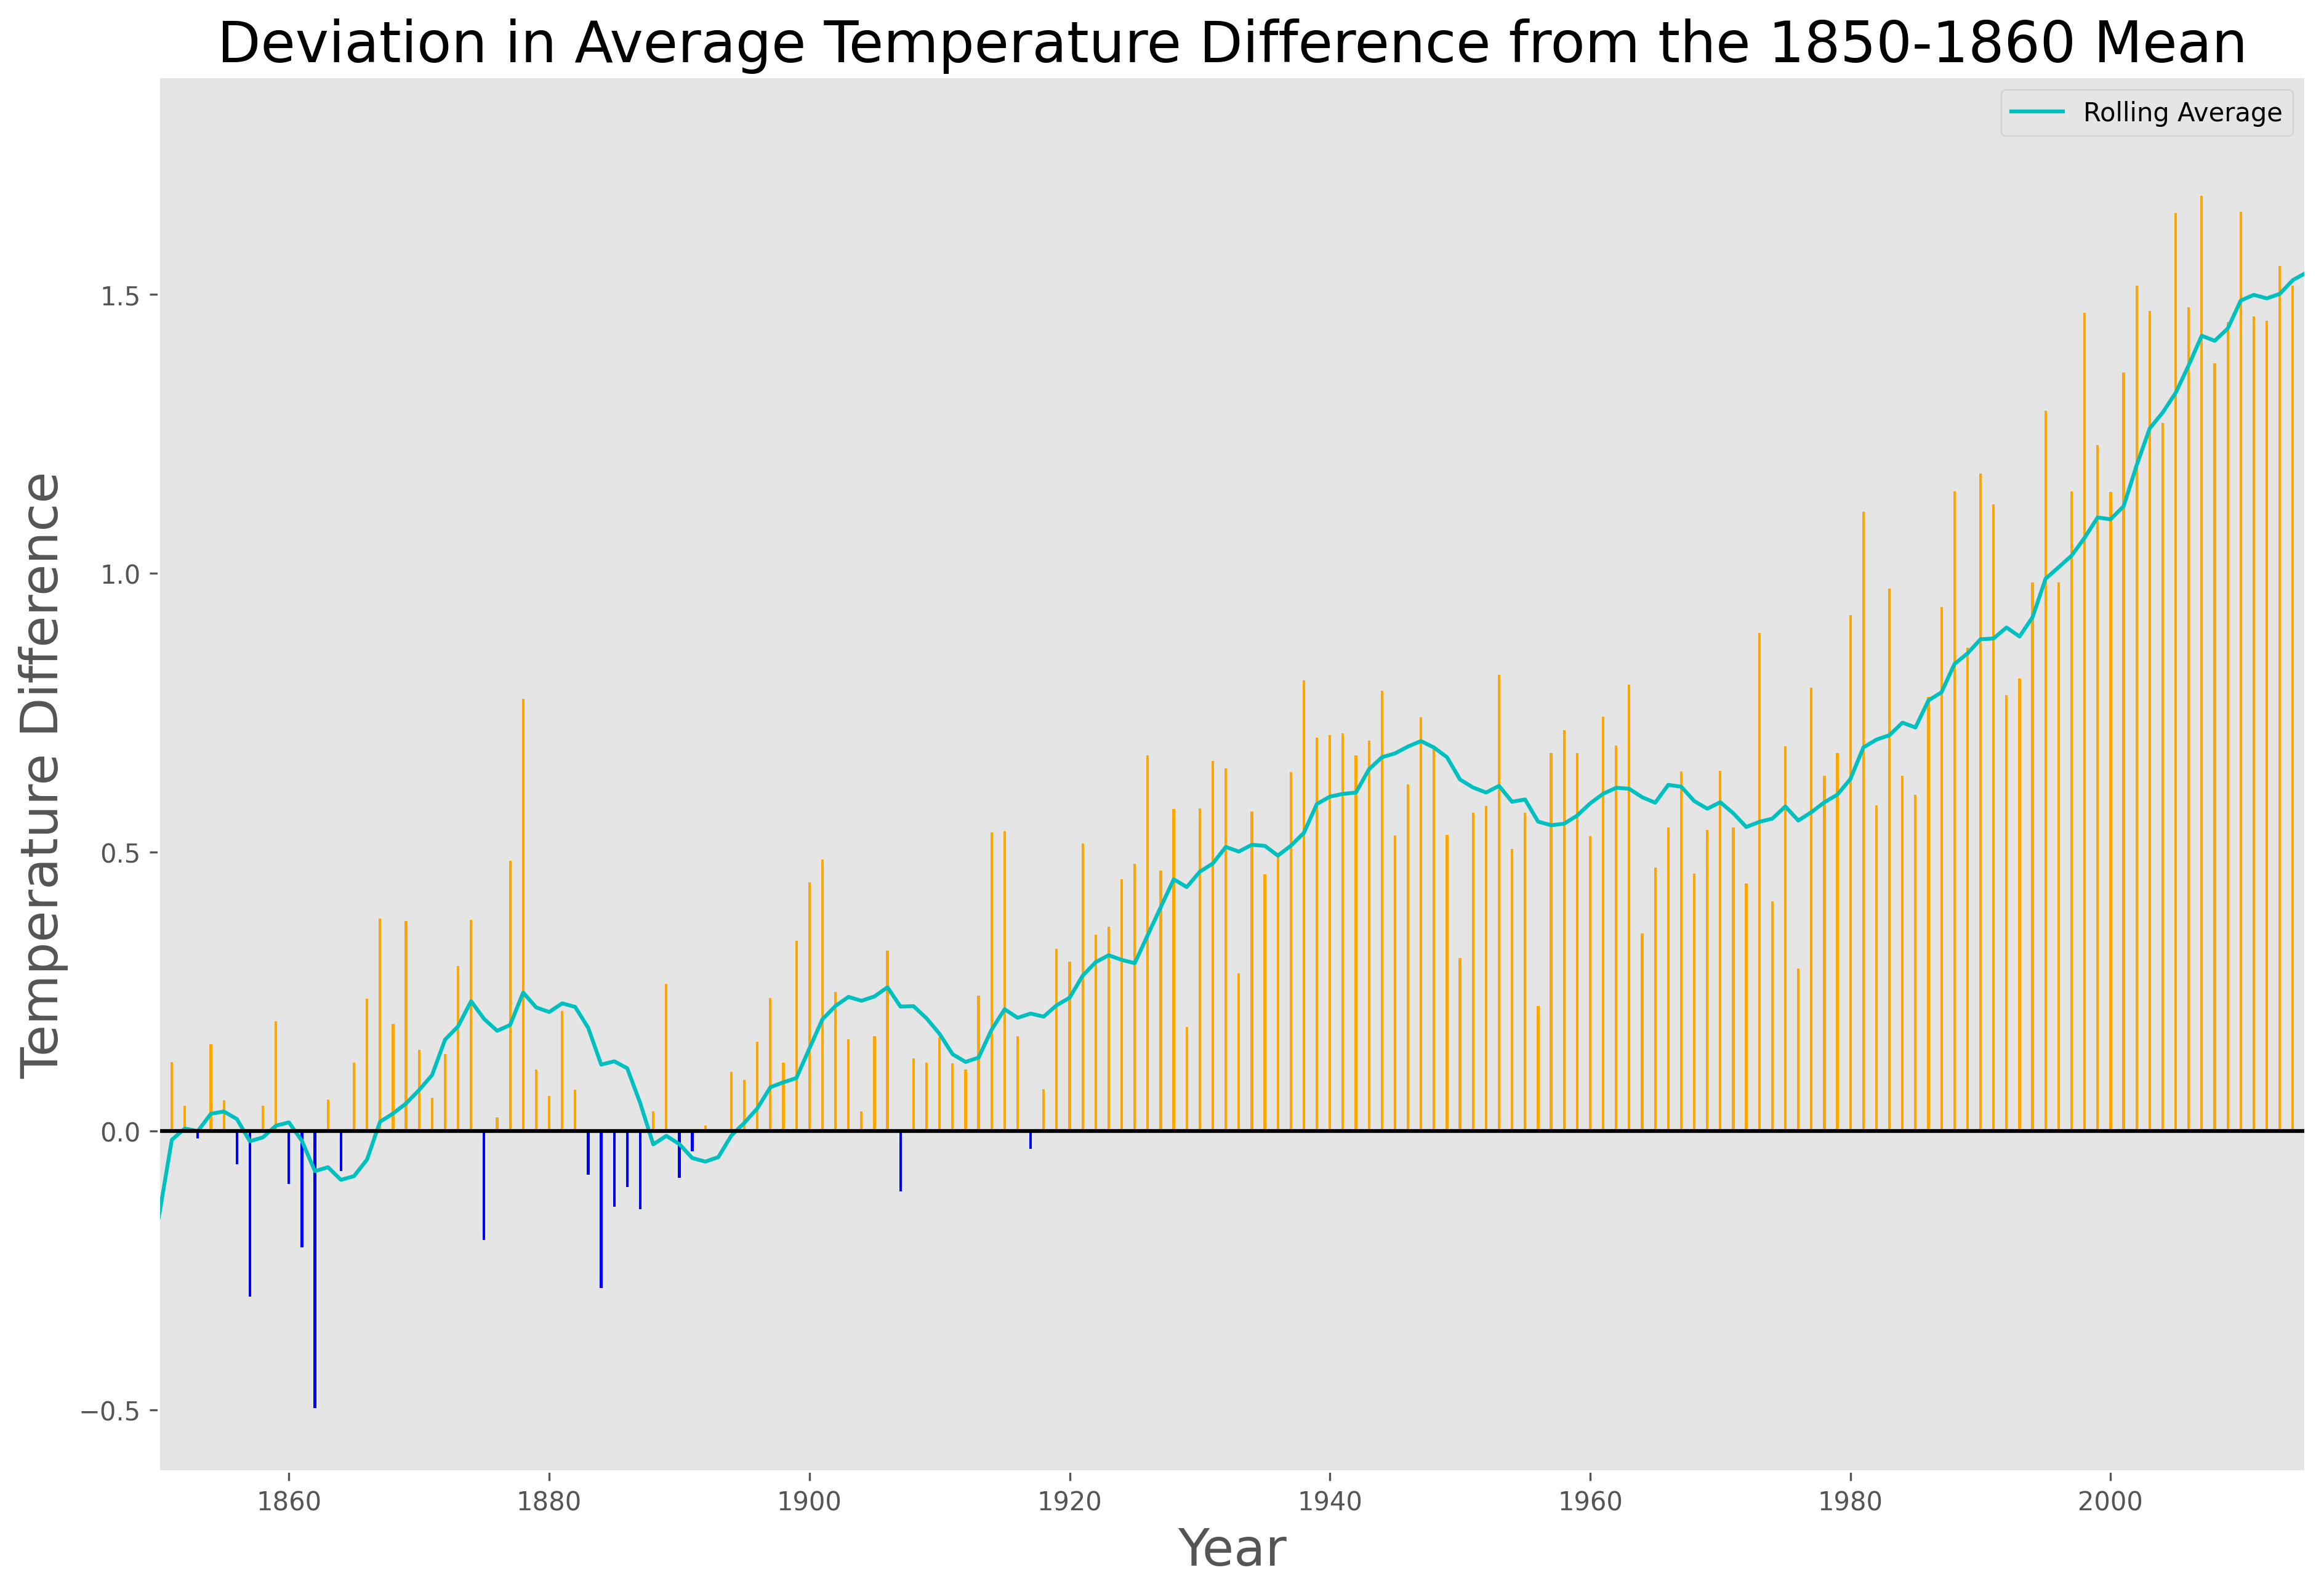

In [16]:
# plotting rolling average deviation of average temperature
plt.style.use('ggplot')
fig_4 = plt.figure(figsize=(15, 10),dpi=300)
plt.bar(temp_global.Year, 
        temp_global['deviation'].values, 
        width=.2, 
        color=temp_global.positive_dev.map({True: 'orange', 
                                            False: 'b'}))
plt.plot(temp_global.Year,
         temp_global['rolling'].values,
         color='c')
plt.axhline(y=0.0, color='k', linestyle='-')

plt.grid(False)
plt.xlim(min_year, max_year)
plt.legend(['Rolling Average'])
plt.xlabel("Year", fontsize=20)
plt.ylabel("Temperature Difference", fontsize=20)
plt.title("Deviation in Average Temperature Difference from the 1850-1860 Mean", fontsize=22)
plt.savefig('3_Deviation_With_Baseline.png', transparent = True)

# Seasonal Global Temperature Increase 

Is the increase in temperature uniform across all seasons, or are some seasons more susceptible? Grouping the months by season, we inspect whether some seasons are more prone to temperature increases.

In [17]:
def get_season(month):
    if month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Winter'

In [18]:
years = range(min_year, max_year + 1)

In [19]:
# getting seasons & grouping by year and season
df_global['Season'] = df_global['Month'].apply(get_season)
df_seasons = df_global.groupby(by=['Year', 'Season']).mean().reset_index()

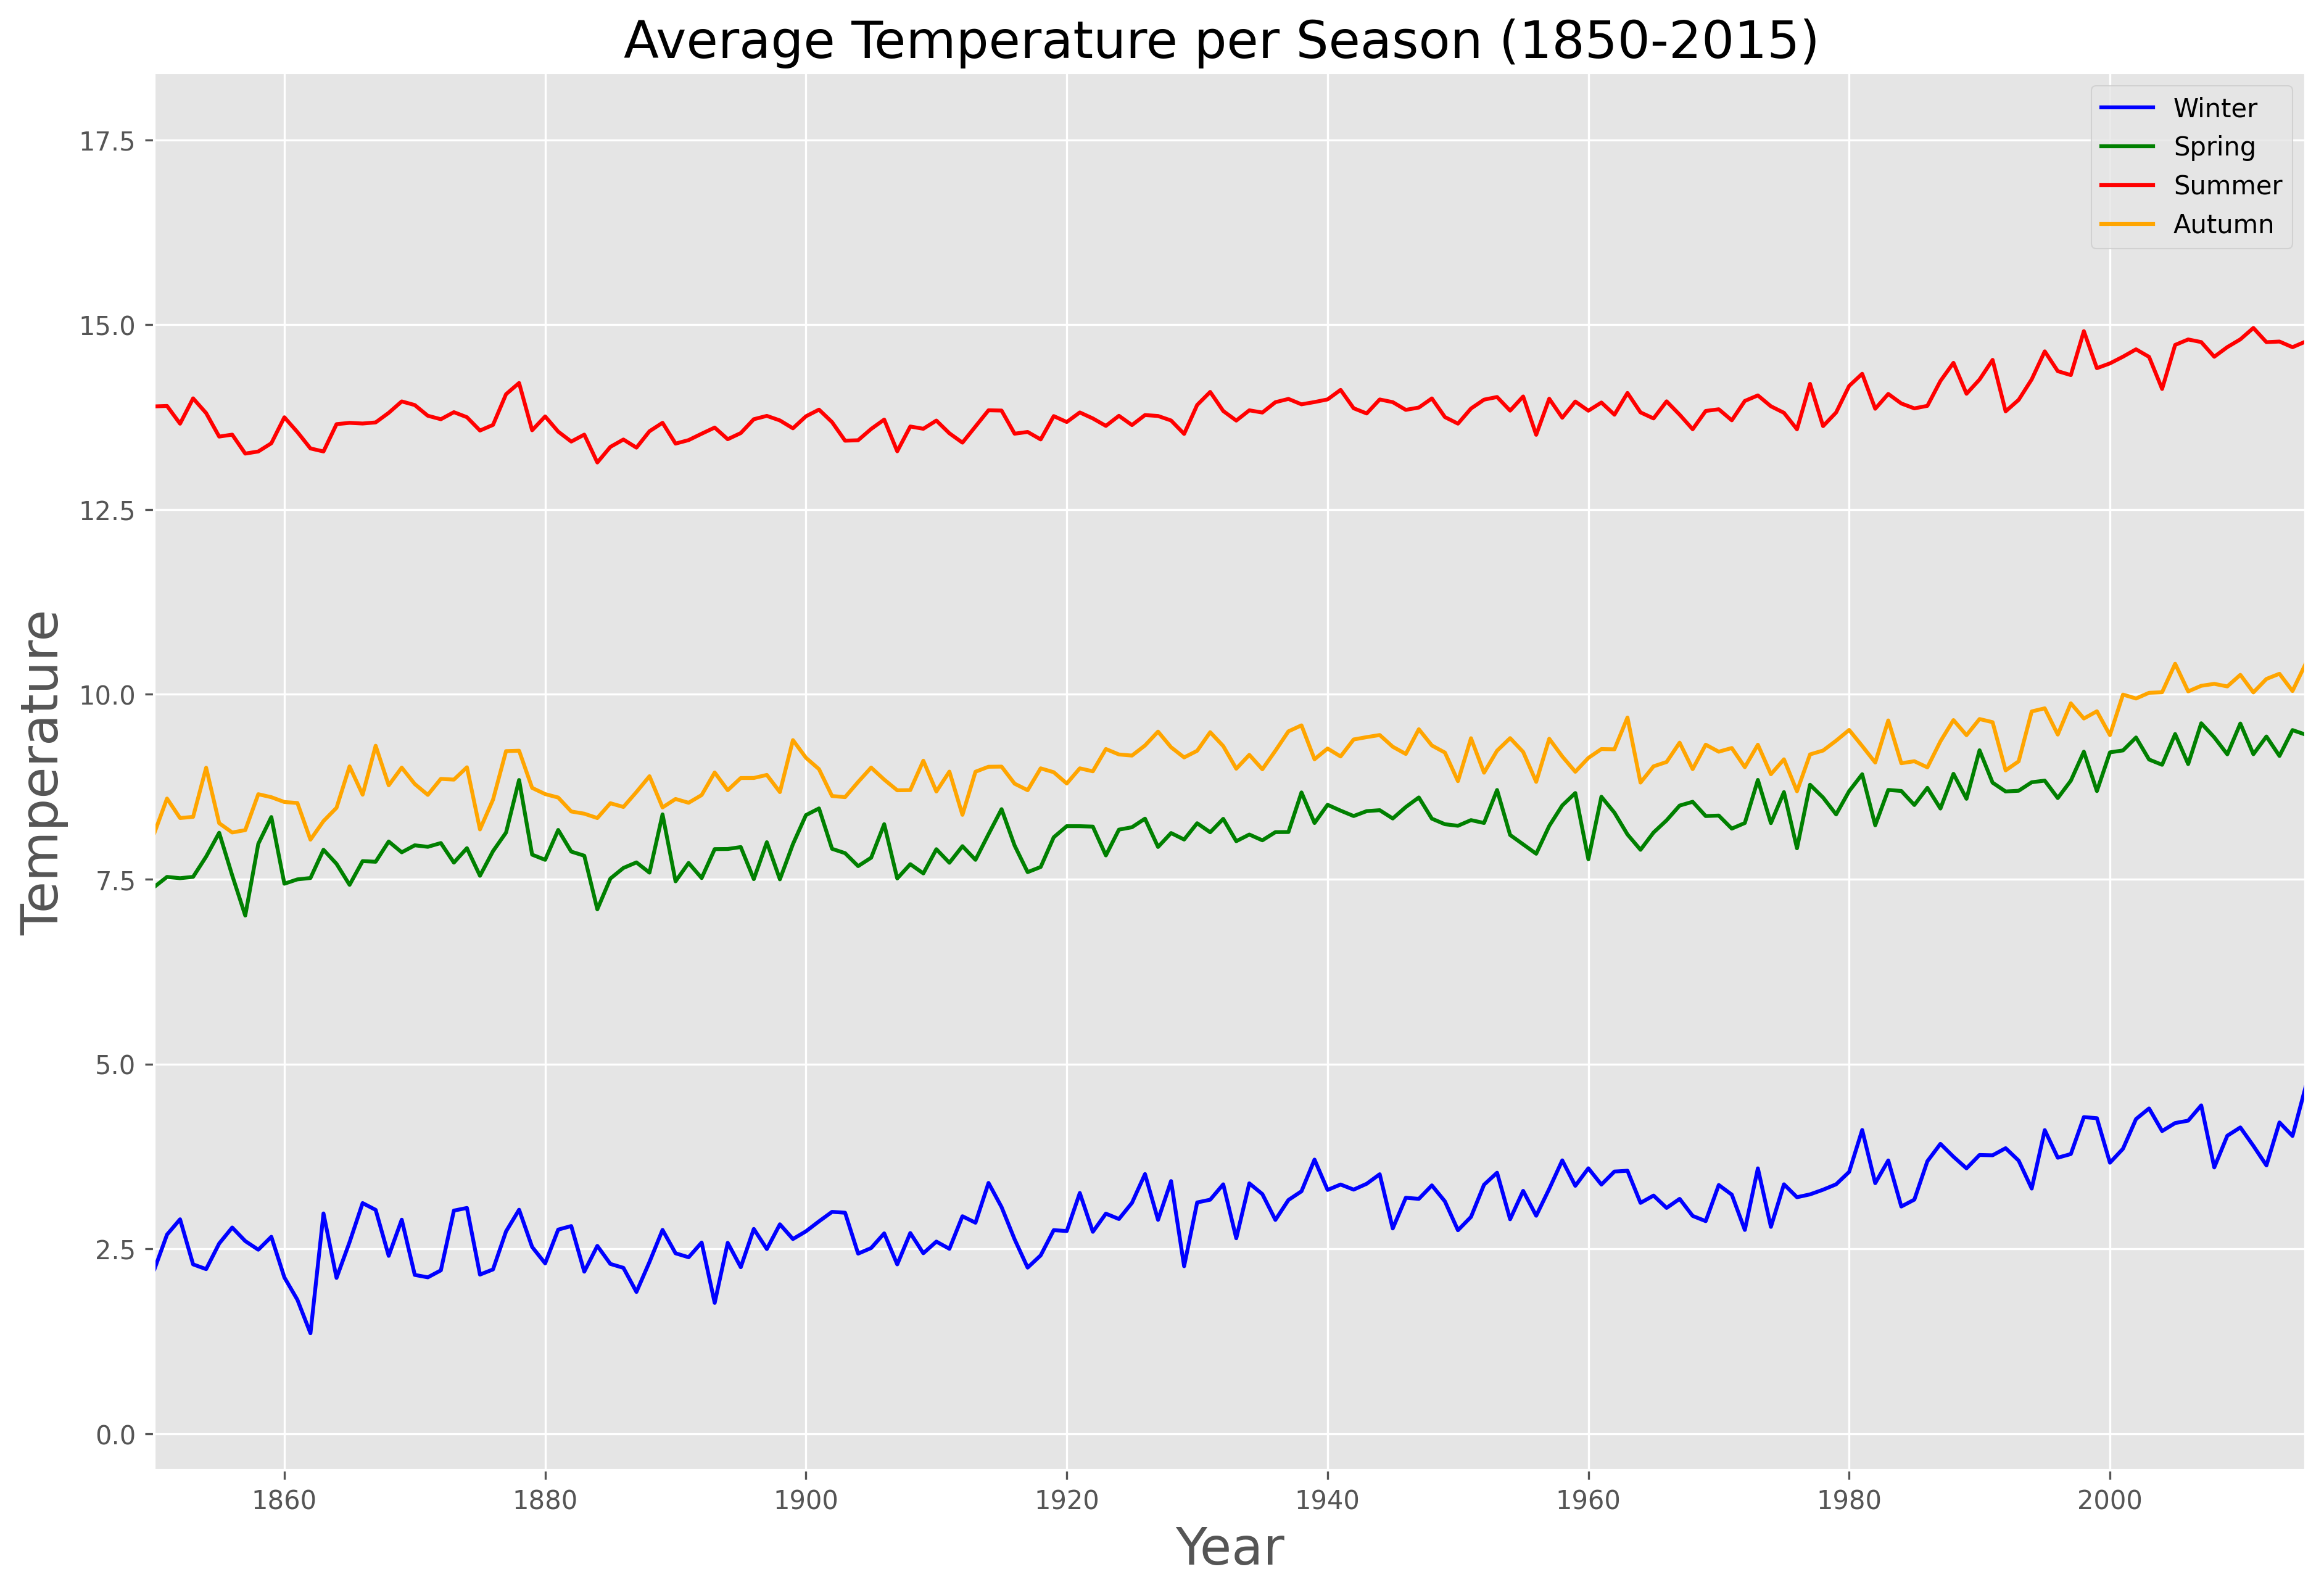

In [20]:
# setting seasons with their corresponding colours
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
colours = ['b', 'g', 'r','orange']

# plotting the seasons
plt.style.use('ggplot')
fig_5 = plt.figure(figsize=(15, 10),dpi=300)
for season, colour in zip(seasons, colours):
    x = df_seasons[df_seasons.Season == season]
    plt.plot(x.Year, 
             x['LandAverageTemperature'].values, 
             color=colour)
plt.legend(seasons)
#plt.grid(False)
plt.xlim(min_year, max_year)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Temperature", fontsize=20)
plt.title('Average Temperature per Season (1850-2015) ', fontsize=20)
plt.savefig('5_Temperature_By_Season.png', transparent = True)

As we see, all seasons have a clear upward trend. For the years examined, winter seems to have more spikes in temperature, and has gotten progressively milder (warmer), faster than the other seasons. 

# Average Monthly Temperature in Spider Charts
Having broken down the season temperatures, we also look into the global temperature by month since 1850. In our depiction, we will color code years based on their century, and give them different shades of each colour.

- 19th century has green shades
- 20th century has blue shades
- 21st century has red shades

In [21]:
df_global = df_global[df_global.Year>=1850]

In [22]:
fig_6 = go.Figure()

# setting title
title = 'Land Average Temperature by Month in 1850-2015'
fig_6.update_layout(title_text=title)

for num, year in enumerate(years):
    # plotting colour based on year
    if year>=2000:
        c = 'rgb('+str(num+50)+',0,0)' # red shades
    elif year>=1900:
        c = 'rgb(0,0,'+str(num+80)+')' # blue shades
    else:
        c = 'rgb(0,'+str(num+100)+',0)' # green shades
    fig_6.add_trace(go.Scatterpolar(
        r=df_global[df_global.Year==year].LandAverageTemperature,
        theta=df_global[df_global.Year==year].MonthName,
        name=year, 
        mode = 'lines',
        line_color = c))
    
fig_6.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 16])))

fig_6.show()

As expected, across all months, red years of the 21st century most certainly have higher average temperatures than all their counterparts. However, the increase in temperature, although visible, isn't very clear. 
Therefore, we also take the first (1850-1859) and last (2006-2015) decade of the dataset, to record the difference of their average temperatures by Month. 

In [23]:
first_decade = df_global[:120].groupby(by=['MonthName']).mean().reset_index()
first_decade.sort_values(by = ['Month'], inplace = True)

last_decade = df_global[-120:].groupby(by=['MonthName']).mean().reset_index()
last_decade.sort_values(by = ['Month'], inplace = True)

In [24]:
fig_7 = go.Figure()

# setting title
title = 'Land Average Temperature Difference between (1850-1859) and (2006-2015) Decades'
fig_7.update_layout(title_text=title)

fig_7.add_trace(go.Scatterpolar(
      r=last_decade.LandAverageTemperature-first_decade.LandAverageTemperature,
      theta=last_decade.MonthName,
      fill='toself',
      name='Temperature Difference'))

fig_7.add_trace(go.Scatterpolar(
      r=[2]*12,
      theta=last_decade.MonthName,
      name='Critical Temperature Increase'))

fig_7.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 2.5])))

fig_7.show()

As we see, between those two decades, clearly March and November are the closest to having a temperature increase of a critical 2 degree increase.
With this diagram we conclude our EDA. 

If you have futher interest in the subject, you may also benefit from visiting <a href="https://climate.nasa.gov/effects/" title="Kaggle">NASA's climate change effects</a> page 

### <center> If you found this notebook useful, please upvote (and recycle)! ♻</center>